<a href="https://colab.research.google.com/github/Dkepffl/2022-1-ESAA/blob/main/Assignment/Assignment0624_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 07 군집화**
___

## **01 K-평균 알고리즘 이해**
____
- K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘으로, 군집 중심점(centroid)이라는 특정한 임의의 점을 선택헤 해당 중심에 가장 가까운 점을 선택하는 군집화 기법이다.
  + 군집 중심점은 선택된 점들의 평균 지점으로 이동하고, 이동된 중심점에서 다시 가까운 점을 선택, 다시 중심점을 평균 지점으로 이동하는 과정을 반복적으로 수행한다.
  + 모든 데이터에서 더이상 중심점의 이동이 없다면, 반복을 멈추고 해당 중심점에 속하는 데이터들을 군집화한다.

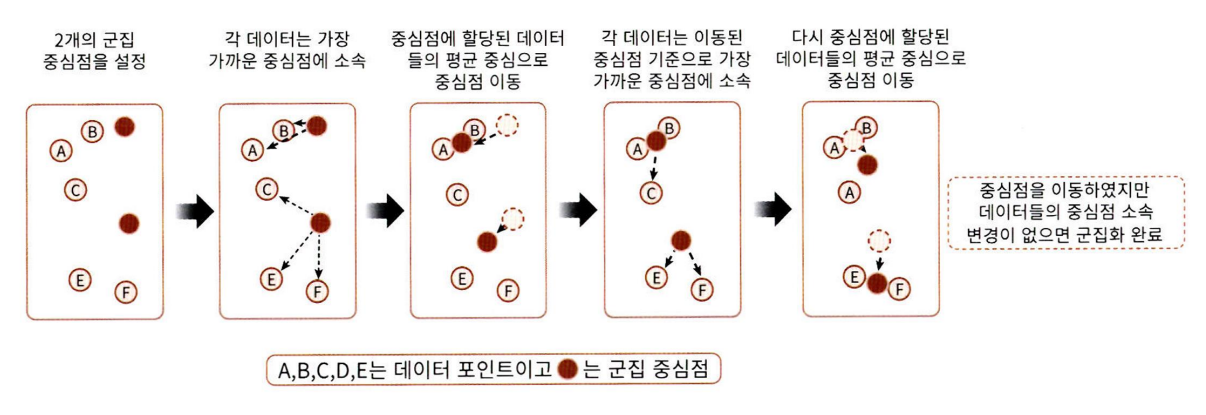

- 단계 별 K-평균
  1. 먼저 군집화의 기준이 되는 중심을, 구성하려는 군집화 개수만큼, 임의의 위치에 배치한다.(ex. 전체 데이터를 2개로 군집화한다면, 2개의 중심을 임의의 위치에 배치한다.)
  2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속된다. 위 그림에서, A와 B가 동일한 중심점에 소속되며, C, E, F가 같은 중심점에 소속된다.
  3. 소속이 결정되면, 군집 중심점을 소속된 데이터의 평균 중심으로 이동한다.
  4. 중심점 이동 후, 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있따면 해당 중심점으로 다시 소속을 변경한다.
  5. 다시 중심을 소속된 데이터의 평균 중심으로 이동한다.
  6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면, 군집화를 종료한다. 그렇지 않다면, 다시 4번 과정부터 반복한다.
- K-평균의 장점
  + 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
  + 알고리즘이 쉽고 간결하다.
- K-평균의 단점
  + 거리 기반 알고리즘으로, 속성의 개수가 매우 많을 경우, 군집화 정확도가 떨어진다.(이를 위해 PCA로 차원 감소를 적용할 수도 있다.)
  + 반복 회수가 많을 경우, 수행 시간이 매우 느려진다.
  + 몇 개의 군집(Cluster)을 형성할지 선택하기 어렵다.

### | **사이킷런 KMeans 클래스 소개**
___
- 사이킷런은 K-평균을 구현하는 `KMeans` 클래스를 제공한다.
```python
class sklearn.cluster.KMeans(n_clusters = 8, init = 'k-means++', n_init = 10, 
                            max_iter = 300, tol = 0.0001, precompute_distances = 'auto', verbose = 0, 
                            random_state = None, copy_x = True, n_jobs = 1, algorithm = 'auto')
```
  + `n_cluster` : `KMeans` 초기화 파라미터 중 가장 중요한 파라미터로, 군집화할 개수, 즉 군집 중심점의 개수를 의미한다.
  + `init` : 초기에 군집 중심점의 좌표를 성적할 방식을 말한다. 보통은 임의로 중심을 설정하지 않고, `k-means++` 방식으로 설정한다.
  + `max_iter` : 최대 반복 횟수. 이 횟수 이전에, 데이터의 중심점 이동이 더이상 없으면 종료한다.
- `KMeans`는 사이킷런의 비지도학습 클래스와 마찬가지로 `fit(데이터셋)`, `fit_transform(데이터셋)` 메서드를 이용해 수행한다.
- 이렇게 수행된 `KMeans` 객체는 군집화 수행이 완료되어, 군집화와 관련된 주요 속성을 알 수 있다.
  + `labels_` : 각 데이터가 속한 군집 중심점 레이블
  + `cluster_centers_` : 각 군집 중심점 좌표를 [군집 개수, 피처 개수] 형태로 알려준다. 이를 이용해 군집 중심점의 위치를 시각화할 수 있다.

### | **K-평균을 이용한 붓꽃 데이터 세트 군집화**
___
- 붓꽃 데이터를 이용해 K-평균 군집화를 수행해보자.
- 붓꽃 데이터셋 : 붓꽃의 꽃받침(`sepal`)와 꽃잎(`petal`)의 길이와 너비에 따라 품종을 분류하는 데이터셋.
- 꽃받침과 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해보고, 이를 분류 값과 비교해본다.

In [4]:
# import moduel

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
# import data
iris = load_iris()

# 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


-  붓꽃 데이터셋을 3개의 그룹으로 군집화해보자. 아래의 조건을 만족하는 `KMeans` 객체를 생성하고, `fit()` 메서드를 적용한다.
  + 군집화 개수 : `n_cluster = 3`
  + 초기 중심 설정 방식 : `init = k-means++`(default)
  + 최대 반복 회수 : `max_iter = 300`(default)

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

- `irisDF` 데이터에 대한 군집화 수행 결과가 `kmeans` 객체 변수로 반환되었다.
- `kmeans`의 `labels_` 속성값을 확인해보면, `irisDF`의 각 데이터가 어떤 중심에 속하는지 알 수 있다.




In [7]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- `labels_` 값이 0, 1, 2로 되어 있다. 이는 각 데이터가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속한다는 것을 의미한다.
- 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지 비교하여, 군집화가 효과적으로 되었는지를 확인해보자.
- 붓꽃 데이터셋의 타겟값은 'target' 컬럼으로, 앞에서 구한 `labels_` 값을 'cluster' 컬럼으로 지정해 `irisDF`에 추가한 뒤, `group by` 연산을 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해, target과 cluster 값 개수를 비교할 수 있다.

In [8]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 분류 타겟값이 0인 경우, 1번 군집으로 모두 잘 군집화되었다.
- 분류 타겟값이 1인 경우, 2개의 데이터만 2번 군집에 속하고, 나머지 48개는 모두 0번 군집으로 군집화되었다.
- 하지만, 분류 타겟값이 2인 경우, 0번 군집에 14개, 2번 군집에 36개로 분산되었다.
- 이번에는 붓꽃 데이터셋의 군집화를 시각화해보자.
  + 붓꽃 데이터셋의 속성(피처)이 4개이므로, 2차원 평면에 적합치 않다. 
  + 따라서 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤, X좌표, Y좌표로 개별 데이터를 표현한다.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


- `pca_x`는 X 좌표 값, `pca_y`는 Y 좌표 값을 의미한다.
- 각 군집별로, cluster 0은 마커 'o', cluster 1은 's', clsuter2는 '^'로 표현하여, 마커별로 별도의 산점도를 그린다.

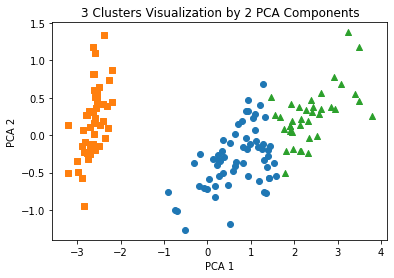

In [11]:
# cluster 값이 0, 1, 2인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출하고, o, s, ^ 로 marker 표시
plt.scatter(x = irisDF.loc[marker0_ind,'pca_x'], y = irisDF.loc[marker0_ind,'pca_y'], marker = 'o') 
plt.scatter(x = irisDF.loc[marker1_ind,'pca_x'], y = irisDF.loc[marker1_ind,'pca_y'], marker = 's')
plt.scatter(x = irisDF.loc[marker2_ind,'pca_x'], y = irisDF.loc[marker2_ind,'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- Cluster 1은 명확히 다른 군집과 잘 분리되어 있다.
- Cluster 0은 Cluster 2와 상당한 수준으로 분리되어 있지만, Cluster 1보다는 명확하게 분리되어 있지 않다.


### | **군집화 알고리즘 테스트를 위한 데이터 생성**
___
- 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트할 수 있는, 간단한 데이터 생성기를 제공한다.
- 대표적으로 `make_blobs()`와 `make_classification()` API가 있다. 
  + 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터셋을 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다.
  + 두 API 사이에 큰 차이는 없지만, `make_blobs()`는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있다.
  + `make_classification()`는 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있다.
  + 둘 다 분류 용도로 테스트 데이터를 생성할 수 있다. 혹은 중심 기반 군집화로 해결하기 어려운 데이터셋을 만들 때 사용한다.
- `make_blobs()`의 입력 파라미터
  + `n_samples` : 생성할 총 데이터 개수(default : 100)
  + `n_features` : 데이터 피처 개수, 시각화를 목표로 할 경우 2개로 설정해 보통 첫번째를 x 좌표, 두번째를 y 좌표 상에 표현
  + `centers` : int값으로, 군집의 개수를 설정한다. ndarray로 표현하면 개별 군집 중심점의 좌표를 의미한다.
  + `cluster_std` : 생성될 군집 데이터의 표준 편차. list 형태로 float 값을 입력하면 서로 다른 표준편차를 가진 데이터셋을 만들 수 있다.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [13]:
# 총 200개의 레코드와, 2개의 피처, 3개의 군집화 기반 분포를 가진 피처 데이터셋 X와 3개의 군집화 값을 가진 타겟 데이터셋 y 반환
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts = True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- 피처 데이터셋 X는 200개의 레코드와 2개의 피처를 가지므로, shape는 (200, 2)이다.
- 군집 타겟 데이터셋 y는 shape가 (200,)이며, [0, 1, 2]라는 3개의 clsuter 값을 각각 67, 67, 66개 가진다.
- 위 데이터셋을 DataFRame으로 변경하여, 데이터 가공을 좀 더 편리하게 해보자.

In [14]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


- 이제 `make_blob()`으로 만든 피처 데이터셋이 어떤 군집화 분포를 가지고 만들어졌는, 확인해보자.
- 타겟값 0, 1, 2에 따라 마커를 다르게 하여 산점도를 그려보면, 다음과 같이 3개의 군집 영역으로 피처 데이터셋이 만들어졌음을 알 수 있다.

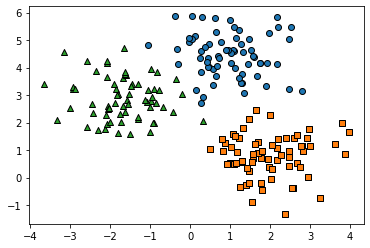

In [15]:
target_list = np.unique(y)

# 각 타겟별 산점도의 marker 값
markers=['o', 's', '^', 'P','D','H','x']

# 3개의 cluster 영역으로 구분한 데이터셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k', marker = markers[target])
    
plt.show()

- 이번에는 이 데이터셋에 `KMeans` 군집화를 수행한 뒤, 군집별로 시각화해보자.
- 먼저 `KMeans` 객체에 `fit_preict(X)`를 수행해, `make_blobs()`의 피처 데이터셋인 X를 군집화한다.
- 이를 앞에서 구한 `clusterDF`의 'kmeans_label' 컬럼으로 저장한다.
- `KMeans` 객체의 `cluster_centers_` 속성은 개별 군집의 중심 위치 좌표를 나타내기 위해 사용한다.

In [16]:
# KMeans 객체를 이용하여 X를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)

# clusterDF의 kmeans_label 컬럼에 저장
clusterDF['kmeans_label']  = cluster_labels

In [18]:
# cluster_centers_는 개별 군집의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

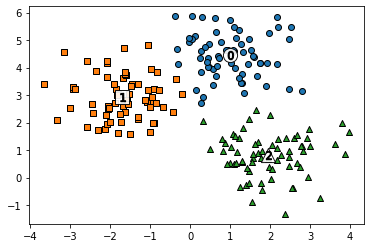

In [21]:
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 반복하면서 marker 별로 산점도 그리기
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k',  marker = '$%d$' % label)

plt.show()

- `make_blobs()`의 타겟과 `kmeans_label`은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있다.

In [22]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


- Target 0이 cluster label 0으로, target 1이 label 2로, target 2가 label 1로 대부분 잘 매핑되었다.
- `make_blobs()`는 `clsuter_std` 파라미터로 데이터의 분포를 조절한다. 이 값이 작을수록, 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있다.

## **02 군집 평가(Cluster Evaluation)**
____
- 앞의 붓꽃 데이터셋의 경우, 결과값에 품종을 뜻하는 타겟 레이블이 있었고, 군집화 결과를 이 레이블과 비교하여, 군집화가 얼마나 효율적으로 되었는지 짐작할 수 있었다.
- 하지만 대부분의 군집화 데이터셋은 비교할 수 있는 타겟 레이블을 가지고 있지 않다.
- 또한 군집화는 분류(Classification)와 유사해보일 수 있으나, 성격이 많이 다르다. 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도, 그 안에서 더 세분화된 군집화를 추구하거나, 서로 다른 분류 값의 데이터도 '더 넓은' 군집화 레벨화 등의 영역을 가지고 있다.
- 비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하는 것은 어렵지만, 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 사용한다.

### | **실루엣 분석의 개요**
___
- 실루엣 분석(silhouette analysis)는 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 나타낸다. '효율적으로 잘 분리되었다'는 것은 다른 군집과의 거리는 떨어져 있고, 동일 군집 끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미이다. 군집화가 잘 될수록, 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있다.
- 실루엣 분석은 실루엣 계수(silhouette coefiicient)를 기반으로 한다.
  + 실루엣 계수는 개별 데이터가 가지는 군집화 지표이다.
  + 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되었고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리되었는지를 나타낸다.
  + 해당 데이터와 같은 군집 내에 있는 다른 점들 사이의 거리의 평균값 a(i)와 해당 데이터가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산한다.
  + 실루엣 계수의 정의 : $$ s(i) \frac{b(i) - a(i)}{max( a(i), b(i) )}$$
  + 실루엣 계수는 -1과 1 사이의 값을 가지며, 1에 가까울수록, 근처의 군집과 더 멀리 떨어져 있고, 0에 가까울수록 근처의 군집과 가깝다. - 값은 다른 군집에 데이터가 할당되었음을 의미한다.
- 사이킷런은 실루엣 분석을 위해 다음과 같은 메서드를 제공한다.
  + `silhouette_samples` : 피처 데이터셋과 레이블 값을 입력하면, 각 데이터의 실루엣 계수를 계산해 반환한다.
  ```python
sklearn.metrics.silhouette_samples(X, labels, metric = 'euclidean', **kwds)
  ```
  + `silhouette_score` : 피처 데이터셋과 레이블 값을 입력하면, 전체 데이터의 실루엣 계수 평균 값을 반환한다. 즉, `np.means(silhouette_samples())`이다. 이 값이 높을수록, 군집화가 잘 되어 있다고 보통 판단하지만, 항상 그런 것은 아니다.
```python
klearn.metrics.silhouette_score(X, labels, metric = 'euclidean', sample_size = None, **kwds)
```
- 좋은 군집화의 기준 조건
  1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 `silhouette_score()` 값이 0~1 사이의 값을 가지며, 1에 가까울수록 좋다.
  2. 전체 실루엣 계수의 평균값과 개별 군집의 평균값 편차가 크지 않다.


### | **붓꽃 데이터 세트를 이용한 군집 평가**
___
- 앞의 붓꽃 데이터셋 군집화 결과를 실루엣 분석으로 평가해보자.
- `sklearn.metrics` 모듈의 `silhouette_samples()`와 `silhouette_score()`를 사용한다.

In [23]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [24]:
# load data
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)

# K-평균 군집화
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

In [25]:
# iris의 모든 개별 데이터 실루엣 계수값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

silhouette_samples() return 값의 shape (150,)


In [26]:
# 모든 데이터의 평균 실루엣 계수값을 구함 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score : {0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score : 0.553


In [27]:
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 평균 실루엣 계수 값이 약 0.553이다. 1번 군집의 경우, 0.8 이상의 높은 실루엣 값을 나타내므로, 다른 군집의 실루엣 계수 값이 평균보다 낮다는 것을 추측할 수 있다.
- 군집별 평균 실루엣 계수 값을 알아보자.

In [28]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 1번 군집의 실루엣 계수 평균 값이 약 0.80임에 반해, 0번 군집은 약 0.42, 2번 군집은 약 0.45로 1번 군집보다 낮은 실루엣 계수 평균값을 가진다.

### | **군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**
___
- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서, 반드시 최적의 군집 개수로 군집화가 잘 되었다고 볼 수 없다. 
  + 예를 들어, 특정 군집 내의 실루엣 계수 값만 너무 높으면, 다른 군집은 내부 데이터끼리 너무 떨어져 있어 실루엣 값이 낮더라도, 평균적으로 높은 값을 가질 수 있다.
- 개별 군집별로 적당히 분리된 거리를 유지하면서 군집 내의 데이터가 서로 잘 뭉쳐 있어야, K-평균의 적절한 군집 개수가 설정되었다고 할 수 있다.
- 각 경우 별로 전체 평균 실루엣 계수이 높되, 군집별 평균 실루엣 계수가 균일한 군집 개수를 고르면, 군집 개수를 최적화할 수 있다.

In [29]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

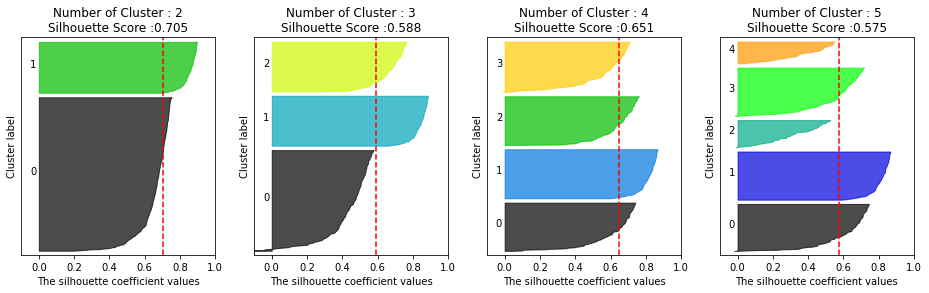

In [33]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1, center_box = (-10.0, 10.0), shuffle = True, random_state = 1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2, 3, 4, 5], X)

- 평균 실루엣 계수 값이 약 0.65이고, 개별 군집의 평균 실루엣 계수 값이 비교적 균일하므로, 군집이 4개일 때, 군집 개수가 가장 이상적이다.

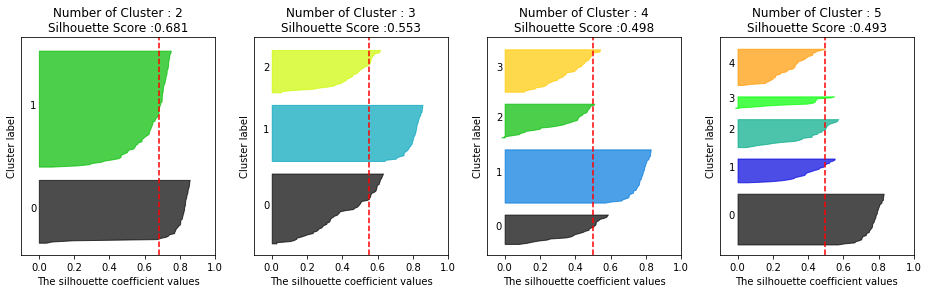

In [34]:
# 붓꽃 데이터의 최적 군집 개수
from sklearn.datasets import load_iris

iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

- 붓꽃 데이터의 경우, K-평균으로 군집화할 때, 군집 개수를 2개로 하는 것이 전체 평균 실루엣 계수값이 높고, 각 군집 별 실루엣 계수 평균값도 균일하다.
- 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로, 데이터의 크기가 커진다면, 수행시간이 크게 늘어난다. 이 경우, 군집 별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고려해야 한다.

## **03 평균 이동**
____

### | **평균 이동(Mean Shift)의 개요**
___
- 평균 이동(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 이동하면서 군집화를 수행한다.
- 하지만 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동한다면, **평균 이동**은 중심을 **데이터의 밀도가 가장 높은 곳** 이동한다.
- 평균 이동 군집화는 데이터의 분포도를 이용해, 군집 중심점을 찾는다. 
  + 군집 중심점은 데이터가 모여 있는 곳이라는 생각에서 착안했다.
  + 이를 위해 확률 밀도 함수(pdf)를 이용한다. 
  + 데이터가 가장 집중적으로 모여있어, 확률 밀도 함수의 정점을 군집 중심점으로 선택한다.
  + 주어진 모델의 확률 밀도를 찾기 위해, 일반적으로 KDE(Kernel Density Estimation)을 이용한다.
- 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해, 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤, 그 반환 값을 현재 위치에서 업데이트 하면서 이동하는 방식이다. 그리고 이를 전체 데이터에 반복적으로 적용한다.

- KDE(Kernel Density Estimation)는 커널(Kernel) 함수를 이용해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다.
- 관측된 데이터 각각에 커널 함수를 적용하고, 그 값을 모두 더한 뒤, 데이터 개수로 나눠 pdf를 추정한다.
  + 확률 밀도 함수(pdf) : 확률 변수의 분포를 나타내는 함수. pdf를 이용해 변수의 평균, 분산, 확률 분포 등을 알 수 있다.
  + 대표적인 커널 함수로 가우시안 분포 함수가 사용된다.
- KDE는 다음과 같은 커널 함수식으로 표현된다. $$ KDE = \frac{1}{n} \sum_{i=1}^n K_h (x - x_i ) = \frac{1}{nh} \sum_{i=1}^n K (\frac{x - x_i }{h})$$
  + $K$ : 커널 함수
  + $x$ : 확률 변수 값
  + $x_i$ : 관측값
  + $h$ : 대역폭(bandwidth). KDE 형태를 부드러운 형태로 Smoothing할 때 적용된다. 이 값에 따라 확률 밀도 추정 성능이 결정된다.
    * 작을수록 좁고 뾰족한 KDE를 가지며, 변동성이 큰 방식으로 pdf를 추정하기 때문에 과적합하기 쉽다.
    * 클수록 과도하게 smoothing되어, 지나치게 단순한 방식으로 pdf를 추정하며, 과소적합하기 쉽다.
- 일반적으로 평균 이동 군집화는 대역폭이 클수록 smoothing된 KDE로 인해, 적은 수의 군집 중심점을 가지며, 대역폭이 적을수록 많은 수의 군집 중심점을 가진다.
- 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행한다.
- 사이킷런은 평균 이동 군집화를 위한 `MeanShift` 클래스를 제공한다.
  + `bandwidth` : KDE의 대역폭 h로, 가장 중요한 초기화 파라미터이다. 군집화의 품질에 큰 영향을 미치기 때문에, 사이킷런은 최적 대역폭 계산을 위해  `estimate_bandwidth()` 함수를 제공한다.

In [35]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

In [36]:
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)

In [37]:
meanshift= MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2 3 4 5]


- 군집이 0부터 5까지, 6개로 분류되었다.
- 일반적으로 `bandwidth` 값을 작게 할수록 군집 개수가 많아진다.
- 이번에는 `bandwidth`를 1.0으로 높여, `MeanShift`를 수행해보자.

In [41]:
meanshift= MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 :', np.unique(cluster_labels))

cluster labels 유형 : [0 1 2]


- 3개의 군집으로 군집화되었다.
- 데이터의 분포 유형에 따라 `bandwidth` 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있다.
- 따라서 `MeanShift`에서는 이 `bandwidth`를 최적 값으로 설정하는 것이 매우 중요하다.
  +  `estimate_bandwidth()` : 피처 데이터셋을 입력하면 `bandwidth` 최적값을 반환한다.

In [42]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값 :', round(bandwidth, 3))

bandwidth 값 : 1.816


- `estimate_bandwidth()`로 측정된 `bandwidth`를 `MeanShift`에 입력하여, 동일한 `make_blobs()` 데이터셋에 군집화해보자.

In [43]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

In [44]:
# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 :',np.unique(cluster_labels))

cluster labels 유형 : [0 1 2]


- 3개의 군집으로 군집화되었다.
- 구성된 3개의 군집을 시각화해보자.
- 평균 이동도 K-평균과 유사하게 중심을 가지고 있으므로, `cluster_centers_` 속성으로 군집 중심 좌표를 표시할 수 있다.

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)

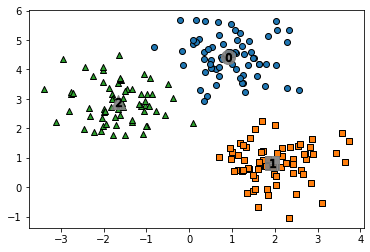

In [47]:
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'gray', alpha = 0.9, marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)
    
plt.show()

- 타겟값과 군집 label 값을 비교해보면, 아래와 같이 1:1로 잘 매칭된 것을 확인할 수 있다.

In [48]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 평균 이동의 장점
  1. 데이터셋의 형태를 특정 형태로 가정한다거나, 특정 분포도 기반의 모델로 가정하지 않기 때문에, 좀 더 유연한 군집화가 가능하단 것이다.
  2. 이상치의 영향력이 크지 않다.
  3. 군집의 개수를 미리 정할 필요가 없다.
- 하지만 알고리즘의 수행 시간이 길고, `bandwidth`의 크기에 따른 군집화 영향도가 매우 크다.
- 이러한 특징 때문에, 평균 이동 군집화는 보통 분석 업무 기반의 데이터셋보다는 컴퓨터 비전 영역에서 더 많이 사용된다. 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행한다.

## **04 GMM(Gaussian Mixture Model)**
____

### | **GMM(Gaussian Mixture Model) 소개**
___

### | **GMM을 이용한 붓꽃 데이터 세트 군집화**
___

### | **GMM과 K-평균의 비교**
___

## **05 DBSCAN**
____

### | **DBSCAN 개요**
___

### | **DBSCAN 적용하기 - 붓꽃 데이터 세트**
___

### | **DBSCAN 적용하기 - make_circles() 데이터 세트**
___